In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv


%matplotlib inline

In [2]:
bdata = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-clean.csv")

bdata.head()

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female,BART
0,21.0,8,12,18,25.0,1.0,4.315789
1,23.0,8,9,19,20.0,1.0,13.294118
2,22.0,12,13,20,44.0,0.0,44.200000
3,22.0,8,12,17,44.0,1.0,2.894737
4,25.0,10,12,17,25.0,1.0,37.461539


In [3]:
#code for part a
#drop null values
bdata = bdata.dropna()
bdata.isnull().sum()

BIS.Score                          0
BAS.Drive.Score                    0
BAS.Fun.Seeking.Score              0
BAS.Reward.Responsiveness.Score    0
Age                                0
Female                             0
BART                               0
dtype: int64

In [4]:
#train test split
predictors = ["BIS.Score", "BAS.Drive.Score", "BAS.Fun.Seeking.Score", "BAS.Reward.Responsiveness.Score", "Age", "Female"]
continuous = ["BIS.Score", "BAS.Drive.Score", "BAS.Fun.Seeking.Score", "BAS.Reward.Responsiveness.Score", "Age"]

X = bdata[predictors]
y = bdata[["BART"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 123)


In [5]:
#code for part b
#z scoring and fitting
z = StandardScaler()
#fitting only continuous  
X_train[continuous] = z.fit_transform(X_train[continuous])

#code for part c
X_test[continuous] = z.transform(X_test[continuous])
X_train.head()

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female
782,-0.883113,1.295603,0.718712,0.666199,-0.385971,1.0
661,-0.592317,0.882860,0.161295,0.666199,-0.385971,1.0
181,-1.173909,-1.180854,-0.396122,-0.909876,0.294303,1.0
713,0.280072,1.708345,-1.510956,1.191558,-0.726108,1.0
753,1.152460,-0.768111,-0.396122,-0.909876,-0.215903,1.0


In [6]:

lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [7]:
#code for part d
#r2 test and train score

print(r2_score(y_train, lr.predict(X_train)))
print(r2_score(y_test, lr.predict(X_test)))

0.06160025414728576
0.049918149081191965


In [8]:
#mae train
mean_absolute_error(y_train, lr.predict(X_train))



10.515015479413034

In [9]:
#mae test
mean_absolute_error(y_test, lr.predict(X_test))


10.552345349747526

In [10]:
#code for part e
#coefs
coef = pd.DataFrame({"Coefs": lr.coef_[0], 
                     "Names": predictors})

coef

,Coefs,Names
0,-0.176978,BIS.Score
1,-0.643760,BAS.Drive.Score
2,2.246023,BAS.Fun.Seeking.Score
3,1.926306,BAS.Reward.Responsiveness.Score
4,0.738744,Age
5,-1.453909,Female


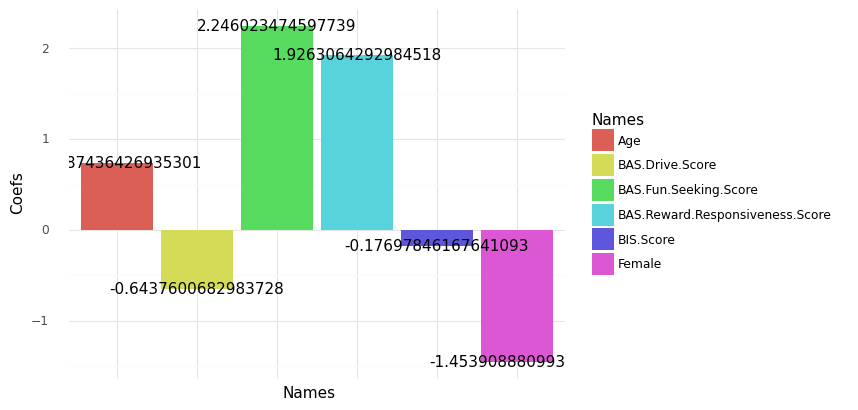

<ggplot: (8766239120782)>

In [11]:
#ggplot
(ggplot(coef, aes(x = "Names", y = "Coefs", fill = "Names" )) + geom_bar(stat = "identity") + theme_minimal() + theme(
     axis_text_x = element_blank()) + geom_text(aes(label= "Coefs"))
)

##Discuss (F)

Age, BAS.Fun.Seeking.Score, and BAS.Reward.Responsiveness.Score have a positive relationship which can be seen by their positive coefficiant values. As all of these factors increase by one unit std, BART will increase by the amount of their coefficiants. BAS.Drive.Score, BIS.Score, and Female have negative relationships so the opposite will happen. 

BAS.Fun.Seeking.Score has the biggest effect because the coefficiant has the greatest magnitude. So again, with a one unit increase of BAS.Fun.Seeking.Score, Bart will increase by the coefficiant which is the largest out of the predictors. 



In [12]:
#code for part g
future = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/bis-bas-bart-syn-future.csv")

In [13]:
future.head()

,BIS.Score,BAS.Drive.Score,BAS.Fun.Seeking.Score,BAS.Reward.Responsiveness.Score,Age,Female
0,21,9,8,18,23,0.0
1,28,9,11,20,21,1.0
2,22,10,14,18,20,1.0
3,20,8,12,18,21,0.0
4,24,11,14,20,18,0.0


In [14]:
future = future.dropna()

future_test = future[predictors]
future_test[continuous] = z.transform(future_test[continuous])

future_bart = lr.predict(future_test)

future_bart


array([[19.21023575],
       [22.92471828],
       [24.57407281],
       [24.28401969],
       [27.43207441],
       [23.02514534],
       [14.78394667],
       [25.81300295],
       [17.12143435],
       [28.05462519],
       [20.17839992],
       [23.79803108],
       [21.46390559],
       [16.30602481],
       [23.43708151],
       [24.35379153],
       [13.78864034],
       [24.97884946],
       [24.35909407],
       [25.59874976],
       [17.66480097],
       [17.69658761],
       [25.54415633],
       [19.85762111],
       [23.197736  ],
       [30.75848725],
       [23.71041591],
       [16.62015783],
       [24.80100119],
       [22.19284654],
       [22.14504873],
       [23.47713227],
       [25.79855927],
       [27.42156247],
       [22.48619899],
       [22.07427463],
       [18.66246855],
       [18.52845786],
       [25.04033621],
       [24.61036823],
       [23.63762707],
       [15.32064289],
       [23.0949162 ],
       [11.68129702],
       [26.58677193],
       [20

In [15]:
df = pd.DataFrame(future_bart, columns=["BART Predicted"])
df.head()

,BART Predicted
0,19.210236
1,22.924718
2,24.574073
3,24.284020
4,27.432074


In [16]:
df.nsmallest(10, ['BART Predicted'])

,BART Predicted
43,11.681297
16,13.788640
6,14.783947
41,15.320643
13,16.306025
27,16.620158
8,17.121434
20,17.664801
21,17.696588
37,18.528458


##Answer to H
Based on the metics that I found out in part D testing the accuracy of the model, I dont trust the predicted values. The R2 scores were very low, only accounting for around 5 -7% of the variation in the model. The MAE scores were also not very promissing (around 10) which is pretty high considering the original data doesn't have a very big ranges of values. 

In [ ]:
# doesn't show this cells output when downloading PDF
!pip install gwpy &> /dev/null

# installing necessary files
!apt-get install texlive texlive-xetex texlive-latex-extra pandoc
!sudo apt-get update
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic

# installing pypandoc
!pip install pypandoc

# connecting your google drive
from google.colab import drive
drive.mount('/content/drive')

# copying your file over. Change "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!cp "drive/My Drive/Colab Notebooks/HW1.ipynb" ./

# Again, replace "Class6-Completed.ipynb" to whatever your file is called (see top of notebook)
!jupyter nbconvert --to PDF "HW1.ipynb"

Reading package lists... Done
Building dependency tree       
Reading state information... Done
pandoc is already the newest version (2.5-3build2).
pandoc set to manually installed.
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono
  fonts-texgyre fonts-urw-base35 javascript-common libapache-pom-java
  libcommons-logging-java libcommons-parent-java libfontbox-java libgs9
  libgs9-common libidn11 libijs-0.35 libjbig2dec0 libjs-jquery libkpathsea6
  libpdfbox-java libptexenc1 libruby2.7 libsynctex2 libteckit0 libtexlua53
  libtexluajit2 libzzip-0-13 lmodern poppler-data preview-latex-style rake
  ruby ruby-minitest ruby-net-telnet ruby-power-assert ruby-test-unit
  ruby-xmlrpc ruby2.7 rubygems-integration t1utils teckit tex-common tex-gyre
  texlive-base texlive-binaries texlive-fonts-recommended texlive-latex-base
  texlive-latex-recommended texlive-pictures texlive-plain-generic tipa
  xfonts-encodings xfonts-ut